# Anime Recommendation System

In [43]:
import pandas as pd

In [44]:
anime_df = pd.read_csv("anime.csv")
recommended_anime_df = pd.read_excel("recommended_anime.xlsx")

### Understanding the structure of data

In [45]:
# First 5 values of dataset
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [46]:
# Last 5 values of dataset
anime_df.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [47]:
# Shape of dataset
anime_df.shape

(12294, 7)

In [48]:
# Info of values of dataset
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [49]:
# Describing dataset
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [50]:
# Data types of columns
anime_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

### Checking and handling null values

In [51]:
# Null values
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [52]:
# Handling null values
anime_df = anime_df.dropna()
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


### Separating the genre column

In [53]:
# Create dummy variables for each genre
genre_dummies = anime_df['genre'].str.get_dummies(sep=', ')
genre_dummies

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Concatenate the dummy variables with the original DataFrame
anime_df_genre = pd.concat([anime_df, genre_dummies], axis=1)
anime_df_genre

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,Under World,Hentai,OVA,1,4.28,183,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Info of anime_df_genre
anime_df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12017 non-null  int64  
 1   name           12017 non-null  object 
 2   genre          12017 non-null  object 
 3   type           12017 non-null  object 
 4   episodes       12017 non-null  object 
 5   rating         12017 non-null  float64
 6   members        12017 non-null  int64  
 7   Action         12017 non-null  int64  
 8   Adventure      12017 non-null  int64  
 9   Cars           12017 non-null  int64  
 10  Comedy         12017 non-null  int64  
 11  Dementia       12017 non-null  int64  
 12  Demons         12017 non-null  int64  
 13  Drama          12017 non-null  int64  
 14  Ecchi          12017 non-null  int64  
 15  Fantasy        12017 non-null  int64  
 16  Game           12017 non-null  int64  
 17  Harem          12017 non-null  int64  
 18  Hentai

### Visualizing the data using plots/graphs

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

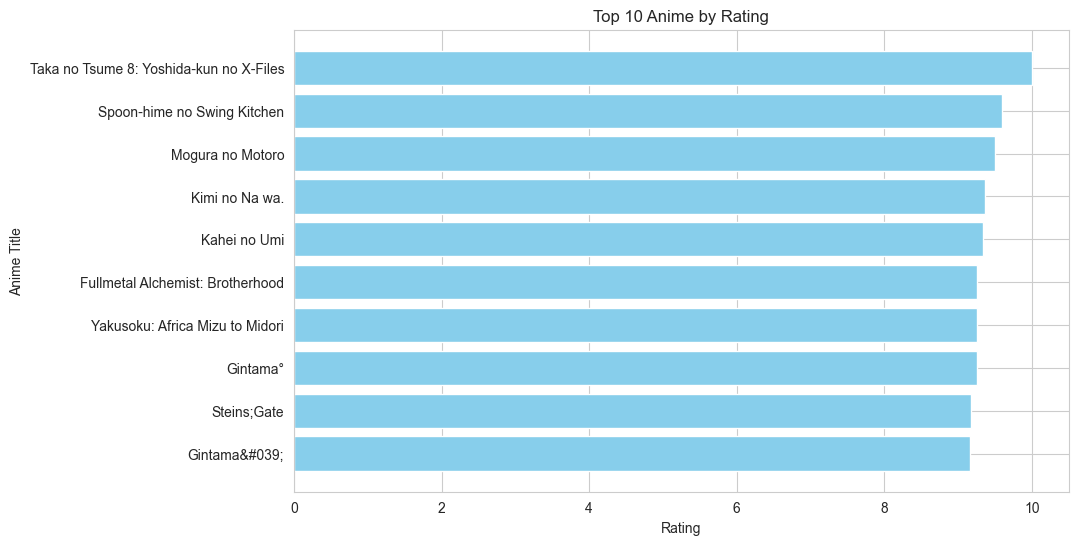

In [57]:
# Get the top 10 anime by rating
top_10_anime = anime_df_genre.sort_values(by='rating', ascending=False).head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_anime['name'], top_10_anime['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Anime Title')
plt.title('Top 10 Anime by Rating')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating on top
plt.show()

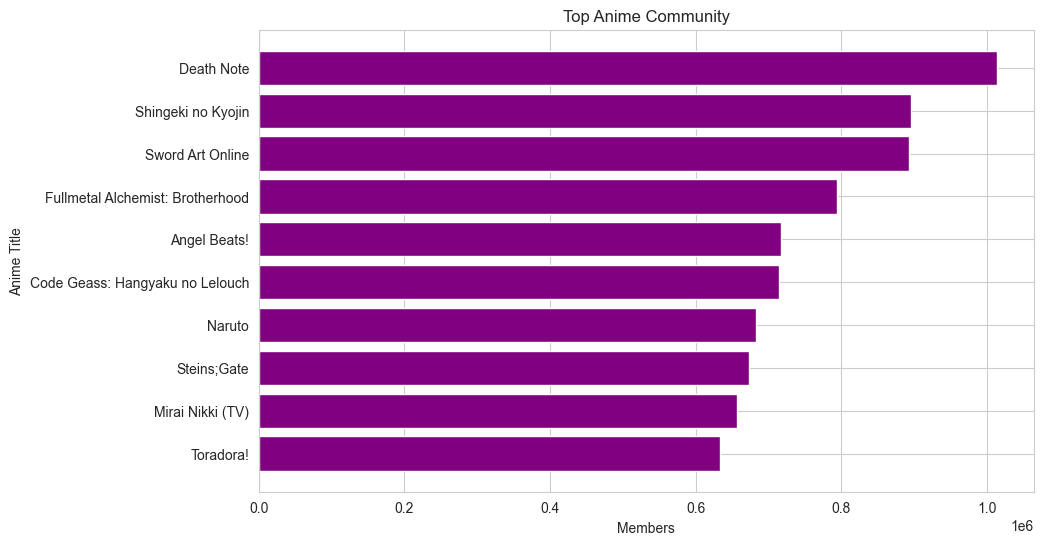

In [58]:
# Get the top anime community
top_anime_community = anime_df_genre.sort_values(by='members', ascending=False).head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_anime_community['name'], top_anime_community['members'], color='purple')
plt.xlabel('Members')
plt.ylabel('Anime Title')
plt.title('Top Anime Community')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating on top
plt.show()

### Recommendation model

In [92]:
def recommend_anime(genre, min_rating=0, max_rating=10, num_recommendations=10):
    # Filter anime that contain the specified genre
    genre_anime = anime_df_genre[anime_df_genre['genre'].str.contains(genre, case=False)]

    # Filter anime within the specified rating range
    genre_anime = genre_anime[(genre_anime['rating'] >= min_rating) & (genre_anime['rating'] <= max_rating)]

    # Sort anime by rating in descending order
    top_rated_anime = genre_anime.sort_values(by='rating', ascending=False)

    # Get the top N highest rated anime
    recommended_anime = top_rated_anime[['name', 'type', 'episodes', 'rating']].head(num_recommendations)

    return recommended_anime #.to_dict('records')

In [93]:
# Example usage
genre = 'Drama'
min_rating = 6
max_rating = 7
recommendations = recommend_anime(genre, min_rating, max_rating, 20)
print(recommendations)

                                                    name     type episodes  \
3399                         Alps no Shoujo Heidi (1979)    Movie        1   
8638                             Genbaku Dome Monogatari      OVA        1   
10496                                             Tegami      OVA        1   
10454                                    Tabi no Kisetsu      OVA        1   
3402                   Black Jack: Sora kara Kita Kodomo      OVA        1   
10314             Son Gokuu no Koutsuu Rule Shugyou Chuu      OVA        1   
10282                            Shounen Tokugawa Ieyasu       TV       20   
10209                 Shima Kousaku no Asia Shinseki-den       TV  Unknown   
10205                                     Shiguang Guiyu      ONA       10   
9801                                         Obasuteyama    Movie        1   
9749                      Nintama Rantarou no Shouboutai      OVA        1   
9715                    Nibiki no Neko to Genkina Kazoku      OV

### Front-End for the system

In [78]:
import gradio as gr

In [95]:
genre_input = gr.Textbox(label="Enter Genre (e.g., Drama)", placeholder="Drama")
min_rating_input = gr.Slider(minimum=0.0, maximum=10.0, value=8.0, label="Minimum Rating")
max_rating_input = gr.Slider(minimum=0.0, maximum=10.0, value=10.0, label="Maximum Rating")
num_recommendations_input = gr.Slider(minimum=1, maximum=20, value=10, label="Number of Recommendations")

output = gr.Dataframe(type="pandas", headers=["name", "type", "episode", "rating"])

iface = gr.Interface(
    fn = recommend_anime,
    inputs = [genre_input, min_rating_input, max_rating_input, num_recommendations_input],
    outputs = output,
    title = "Satoru&Suguru"
)
iface.launch()

Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.1.2, however version 4.29.0 is available, please upgrade.
--------
